In [56]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


In [58]:
df = pd.read_csv(r'C:\Users\Siddharth Mehra\Downloads\archive(7).zip')

In [60]:
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


In [62]:
df.shape

(2000, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductCategory      2000 non-null   object 
 1   Region               2000 non-null   object 
 2   CustomerSegment      2000 non-null   object 
 3   IsPromotionApplied   2000 non-null   object 
 4   ProductionCost       2000 non-null   float64
 5   MarketingSpend       2000 non-null   float64
 6   SeasonalDemandIndex  2000 non-null   float64
 7   CompetitorPrice      2000 non-null   float64
 8   CustomerRating       2000 non-null   float64
 9   EconomicIndex        2000 non-null   float64
 10  StoreCount           2000 non-null   int64  
 11  SalesRevenue         2000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 187.6+ KB


In [66]:
df.isnull().sum()

ProductCategory        0
Region                 0
CustomerSegment        0
IsPromotionApplied     0
ProductionCost         0
MarketingSpend         0
SeasonalDemandIndex    0
CompetitorPrice        0
CustomerRating         0
EconomicIndex          0
StoreCount             0
SalesRevenue           0
dtype: int64

In [68]:
df.isna().sum()

ProductCategory        0
Region                 0
CustomerSegment        0
IsPromotionApplied     0
ProductionCost         0
MarketingSpend         0
SeasonalDemandIndex    0
CompetitorPrice        0
CustomerRating         0
EconomicIndex          0
StoreCount             0
SalesRevenue           0
dtype: int64

In [70]:
df.duplicated().value_counts()

False    2000
Name: count, dtype: int64

In [71]:
numerical_columns = df.select_dtypes(exclude = ['object']).drop(columns = ['SalesRevenue']).columns
categorical_columns = df.select_dtypes(include = ['object']).columns

In [74]:
numerical_columns

Index(['ProductionCost', 'MarketingSpend', 'SeasonalDemandIndex',
       'CompetitorPrice', 'CustomerRating', 'EconomicIndex', 'StoreCount'],
      dtype='object')

In [76]:
categorical_columns

Index(['ProductCategory', 'Region', 'CustomerSegment', 'IsPromotionApplied'], dtype='object')

In [78]:
df

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Electronics,West,High Income,Yes,517.717323,232.614735,0.975678,322.583207,5.041142,91.441434,17,1936.541701
1996,Clothing,West,Middle Income,No,450.390738,209.679267,1.563159,245.091794,3.720744,127.068979,83,2108.352980
1997,Electronics,South,Low Income,Yes,588.046636,189.616137,1.585797,342.856222,4.449142,130.946380,91,2721.300846
1998,Furniture,South,High Income,No,246.240212,124.049514,0.378380,367.191579,3.848678,92.705192,51,1281.359345


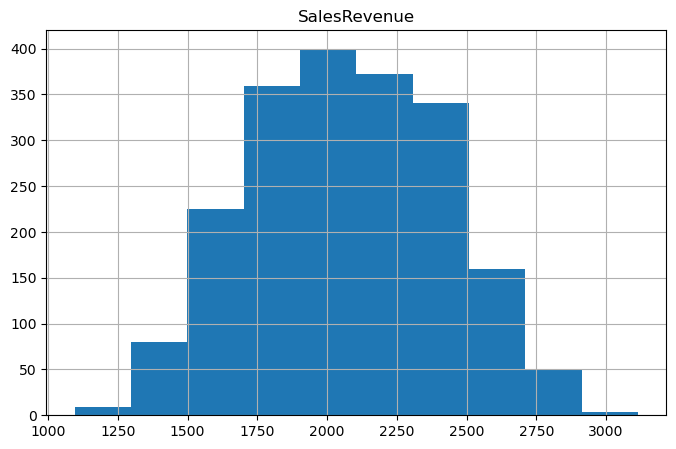

In [80]:
df.hist( 'SalesRevenue', figsize = (8,5))
plt.show()


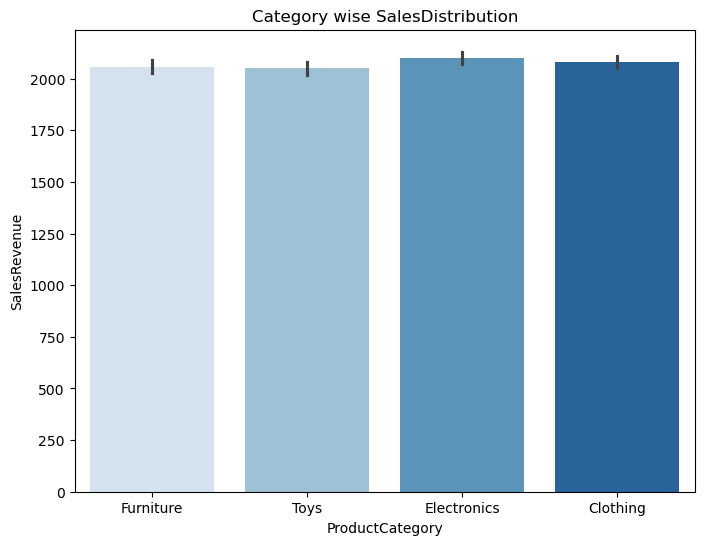

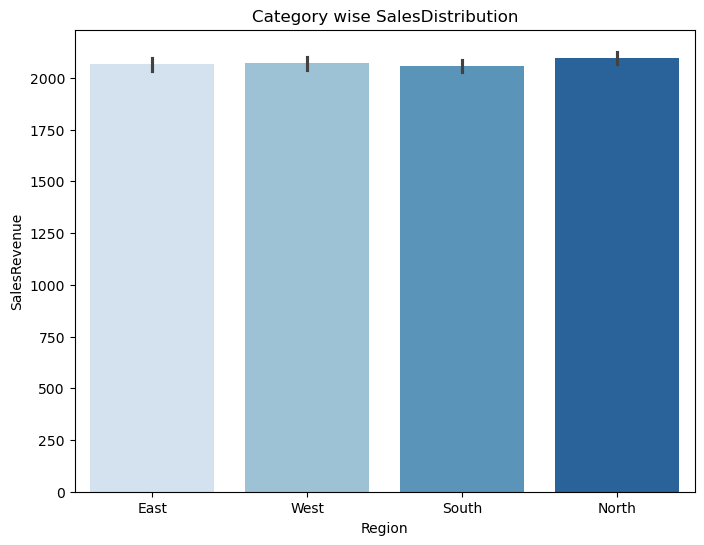

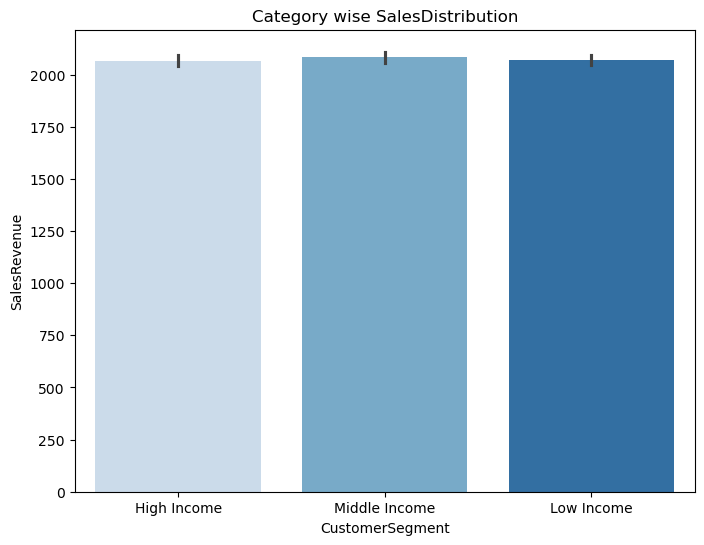

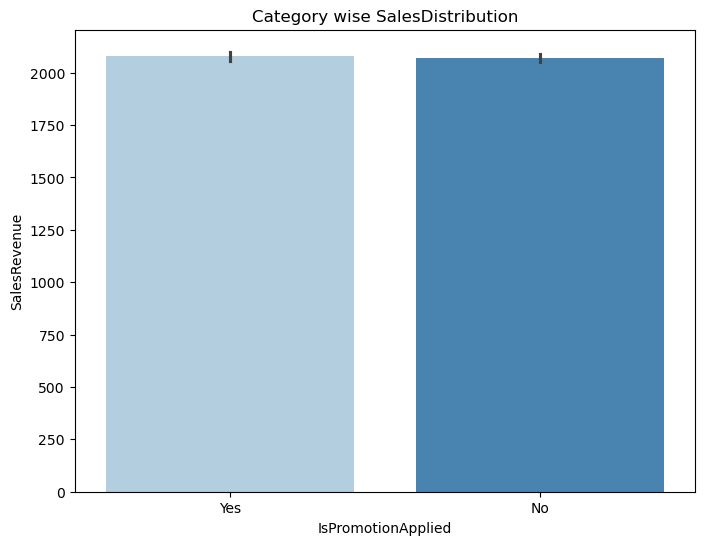

In [81]:
for col in categorical_columns:
    plt.figure(figsize = (8,6))
    sns.barplot( x = col , y= 'SalesRevenue', data = df, palette='Blues' )
    plt.title('Category wise SalesDistribution')
    plt.show()

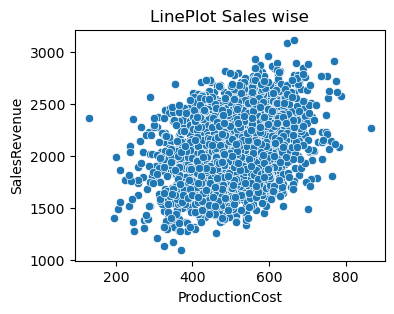

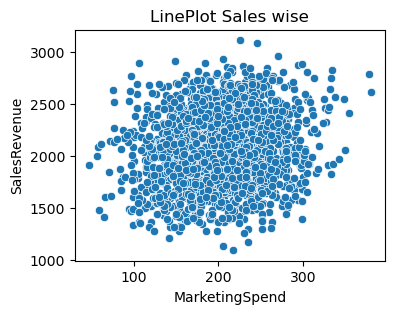

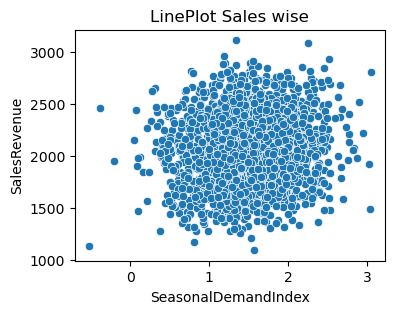

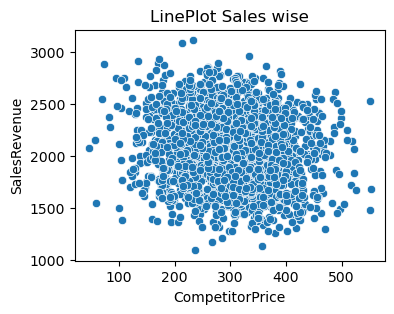

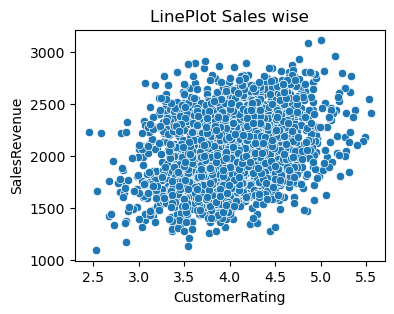

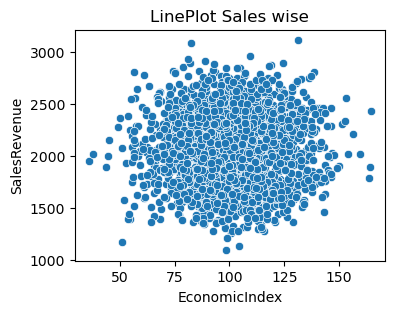

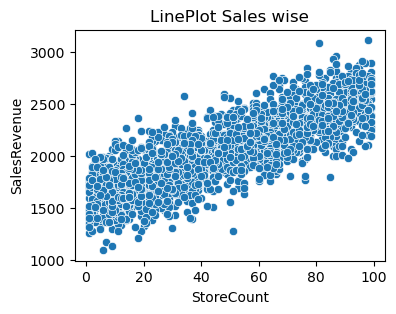

In [83]:
for col in numerical_columns:
    plt.figure(figsize = (4,3))
    sns.scatterplot(x = col, y ='SalesRevenue', data = df)
    plt.title('LinePlot Sales wise')
    plt.show()

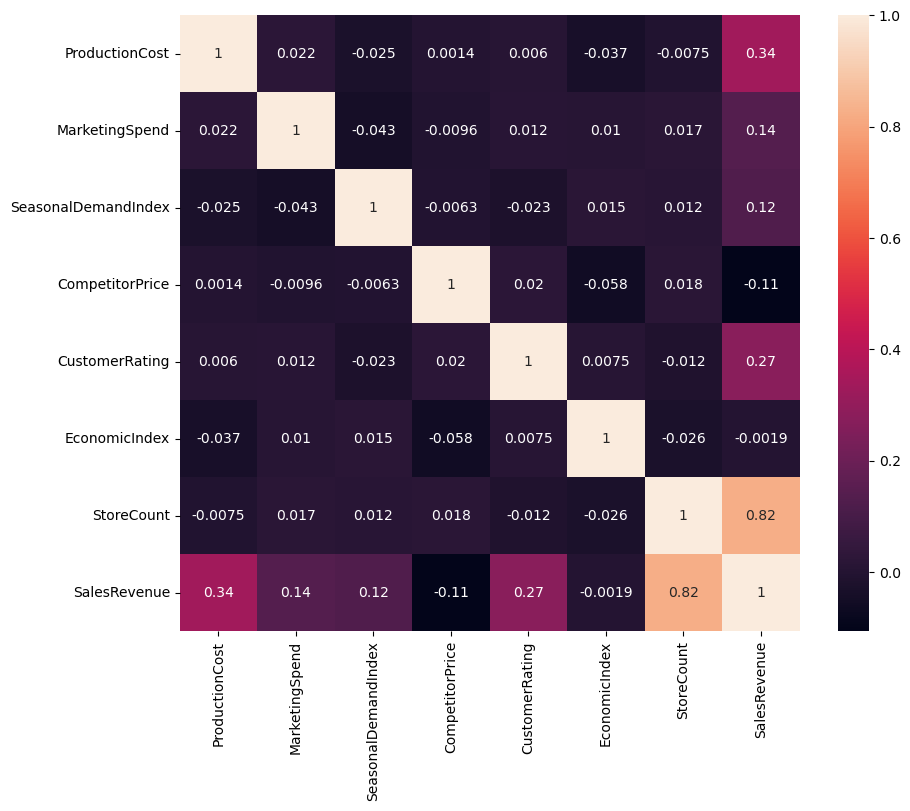

In [84]:
correlation = df[['ProductionCost', 'MarketingSpend', 'SeasonalDemandIndex',
       'CompetitorPrice', 'CustomerRating', 'EconomicIndex', 'StoreCount', 'SalesRevenue']]
corr = correlation.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)
plt.show()

In [85]:
corr

,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
ProductionCost,1.000000,0.022307,-0.025108,0.001394,0.006049,-0.037092,-0.007506,0.335911
MarketingSpend,0.022307,1.000000,-0.042863,-0.009633,0.012198,0.010059,0.016648,0.138905
SeasonalDemandIndex,-0.025108,-0.042863,1.000000,-0.006290,-0.022512,0.014998,0.012045,0.123253
CompetitorPrice,0.001394,-0.009633,-0.006290,1.000000,0.020117,-0.058152,0.017504,-0.106473
CustomerRating,0.006049,0.012198,-0.022512,0.020117,1.000000,0.007480,-0.011540,0.274562
EconomicIndex,-0.037092,0.010059,0.014998,-0.058152,0.007480,1.000000,-0.026465,-0.001938
StoreCount,-0.007506,0.016648,0.012045,0.017504,-0.011540,-0.026465,1.000000,0.823745
SalesRevenue,0.335911,0.138905,0.123253,-0.106473,0.274562,-0.001938,0.823745,1.000000


In [86]:
def annova(inptdata,TargetVariable,Predictor):
    from scipy.stats import f_oneway
    SelectedPredictor =[]
    for col in categorical_columns:
         categoricalgrouplist = inptdata.groupby(col)[TargetVariable].apply(list)
         AnnovaResult = f_oneway(* categoricalgrouplist)
         if AnnovaResult[1] < 0.05:
             SelectedPredictor.append(col)
             print(col,'is correlated with',TargetVariable,'PValues is:',AnnovaResult[1])
         else:
             print(col,'is not correlated with',TargetVariable,'PValues is:',AnnovaResult[1])

    return(SelectedPredictor)
        

In [87]:
annova(inptdata = df, TargetVariable ='SalesRevenue', Predictor = categorical_columns)

ProductCategory is not correlated with SalesRevenue PValues is: 0.061868299092435255
Region is not correlated with SalesRevenue PValues is: 0.28659515614588665
CustomerSegment is not correlated with SalesRevenue PValues is: 0.6549155170311582
IsPromotionApplied is not correlated with SalesRevenue PValues is: 0.538834847941815


[]

In [89]:
x = df[['StoreCount','ProductionCost','MarketingSpend','CustomerRating','CompetitorPrice']]
y = df[['SalesRevenue']]

In [90]:
from sklearn.preprocessing import MinMaxScaler
Scaled = MinMaxScaler()
X = Scaled.fit_transform(x)

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( X, y, random_state = 42, test_size = 0.3)

In [92]:
x_train

array([[0.59183673, 0.54571354, 0.54687357, 0.49321692, 0.31846562],
       [0.82653061, 0.53330539, 0.37701623, 0.62663773, 0.4167041 ],
       [0.56122449, 0.61692141, 0.2273249 , 0.48746207, 0.61035589],
       ...,
       [0.85714286, 0.37058975, 0.47247864, 0.44053465, 0.57677612],
       [0.8877551 , 0.61011182, 0.45473722, 0.45590254, 0.35776247],
       [0.46938776, 0.56087373, 0.45726892, 0.3905319 , 0.7216861 ]])

In [93]:
x_test

array([[0.86734694, 0.5738533 , 0.498303  , 0.38617695, 0.42109996],
       [0.32653061, 0.61963402, 0.5900038 , 0.45068757, 0.41701932],
       [0.52040816, 0.577865  , 0.41230973, 0.44191926, 0.47366581],
       ...,
       [0.12244898, 0.45326386, 0.72937888, 0.81015766, 0.55831857],
       [0.24489796, 0.84268857, 0.36971774, 0.5518998 , 0.50754996],
       [0.42857143, 0.4929946 , 0.53710971, 0.61438266, 0.52158064]])

In [95]:
x_train.shape

(1400, 5)

In [138]:
y_test

,SalesRevenue
1860,2387.954000
353,1959.435913
1333,2097.370494
905,1405.529644
1289,2108.001611
...,...
148,1657.065993
1554,2693.576622
1956,1789.805729
925,2233.062320


In [104]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [109]:
y_pred =linreg.predict(x_test)

In [132]:
y_pred.shape

(600, 1)

In [112]:
from sklearn import metrics


In [114]:
print('RMSE Score:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print('R2 score is:',metrics.r2_score(y_test,y_pred))
print('MAE is', metrics.mean_absolute_error(y_test,y_pred))

RMSE Score: 105.6281062687802
R2 score is: 0.9096361593695063
MAE is 85.28846184212914


In [266]:
df_Model = pd.DataFrame( )
df_Model['Actual'] =  y_test
df_Model['PredictedValue'] = y_pred
df_Model['Errors'] = y_pred - y_test
df_Model['APE'] = (df_Model['Errors']/df_Model['Actual'] ) * 100
df_Model

,Actual,PredictedValue,Errors,APE
1860,2387.954000,2460.813111,72.859112,3.051110
353,1959.435913,2041.639250,82.203337,4.195255
1333,2097.370494,2127.100649,29.730155,1.417497
905,1405.529644,1523.278010,117.748366,8.377509
1289,2108.001611,2028.315521,-79.686090,-3.780172
...,...,...,...,...
148,1657.065993,1695.035511,37.969518,2.291370
1554,2693.576622,2642.126017,-51.450606,-1.910122
1956,1789.805729,1919.753232,129.947504,7.260425
925,2233.062320,2135.031758,-98.030562,-4.389961


In [ ]:
%matplotlib inline
plt.scatter(x = df_Model['Actual'], y = df_Model['PredictedValue'])
plt.scatter( df_Model['Actual'],df_Model['PredictedValue'])


In [219]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_new =  poly.fit_transform(X)

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x_new, y, random_state = 42, test_size = 0.3)

In [223]:
from sklearn.linear_model import LinearRegression
PolyModel = LinearRegression()
PolyModel.fit(x_train,y_train)

LinearRegression()

In [225]:
PolyPred = PolyModel.predict(x_test)

In [229]:
from sklearn import metrics

In [231]:
print('RMSE Score:',np.sqrt(metrics.mean_squared_error(PolyPred,y_test)))
print('R2 score is:',metrics.r2_score(y_test,PolyPred))
print('MAE is', metrics.mean_absolute_error(y_test,PolyPred))

RMSE Score: 107.17035276440471
R2 score is: 0.9069781410835682
MAE is 86.42667209531865


In [262]:
df_predicted = pd.DataFrame()
df_predicted['Actual'] =  y_test
df_predicted['PredictedValue'] = PolyPred
df_predicted['Errors'] = PolyPred - y_test
df_predicted['APE'] = (df_predicted['Errors']/df_predicted['Actual'] ) * 100
df_predicted

,Actual,PredictedValue,Errors,APE
1860,2387.954000,2475.762381,87.808381,3.677139
353,1959.435913,2049.816377,90.380464,4.612576
1333,2097.370494,2132.867335,35.496841,1.692445
905,1405.529644,1527.279992,121.750348,8.662240
1289,2108.001611,2031.422322,-76.579289,-3.632791
...,...,...,...,...
148,1657.065993,1693.303923,36.237931,2.186873
1554,2693.576622,2613.556228,-80.020394,-2.970786
1956,1789.805729,1935.379270,145.573541,8.133483
925,2233.062320,2123.720311,-109.342009,-4.896505
